### Step by step guide to create Breast Cancer Detection using Machine Learning algorithm and deploy it on Heroku with Flask

Major steps to be followed:

1. Problem statement
2. Data collection
3. Exploratory data analysis
4. Feature Engineering
5. Feature Selection
6. Machine Learning Model Training
7. Model Testing
8. Deployment of final model on Heroku via Flask

### 1. Problem statement

Breast cancer is cancer that forms in the cells of the breasts. After skin cancer, breast cancer is the most common cancer diagnosed in women in the United States. Breast cancer can occur in both men and women, but it's far more common in women. Early detection can helps personalized approach to treatment and a better understanding of the disease, which results in increase in survival rate. Mammography imaging technique is helping to detect early stage of tumors in the recent days, but advanced technologies like Artificial Intelligence and Machine Learning techniques can detect and sense cancer cells 5 times smaller than the what has been doing present, and improves the accuracy of the diagnosis. Here, I will use the Machine Learning algorithm on breast cancer tumor information dataset to implement breast cancer detection.

In [10]:
#Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data collection

In [2]:
#Import dataset from Kaggle
df=pd.read_csv('dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
df.shape

(116, 10)

### 3. Exploratory Data Analysis

In [5]:
#Check datatypes of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


From the above output, we can observe that dataset contains only numerical datatypes, without categorical type and null-values

In [8]:
#A quick statistical summary of the dataset
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


We can see that count of each variables along with the mean, standard deviation, minimum and maximum values.

In [11]:
#Will check missing values
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

It's clear that dataset doen't contain any null values

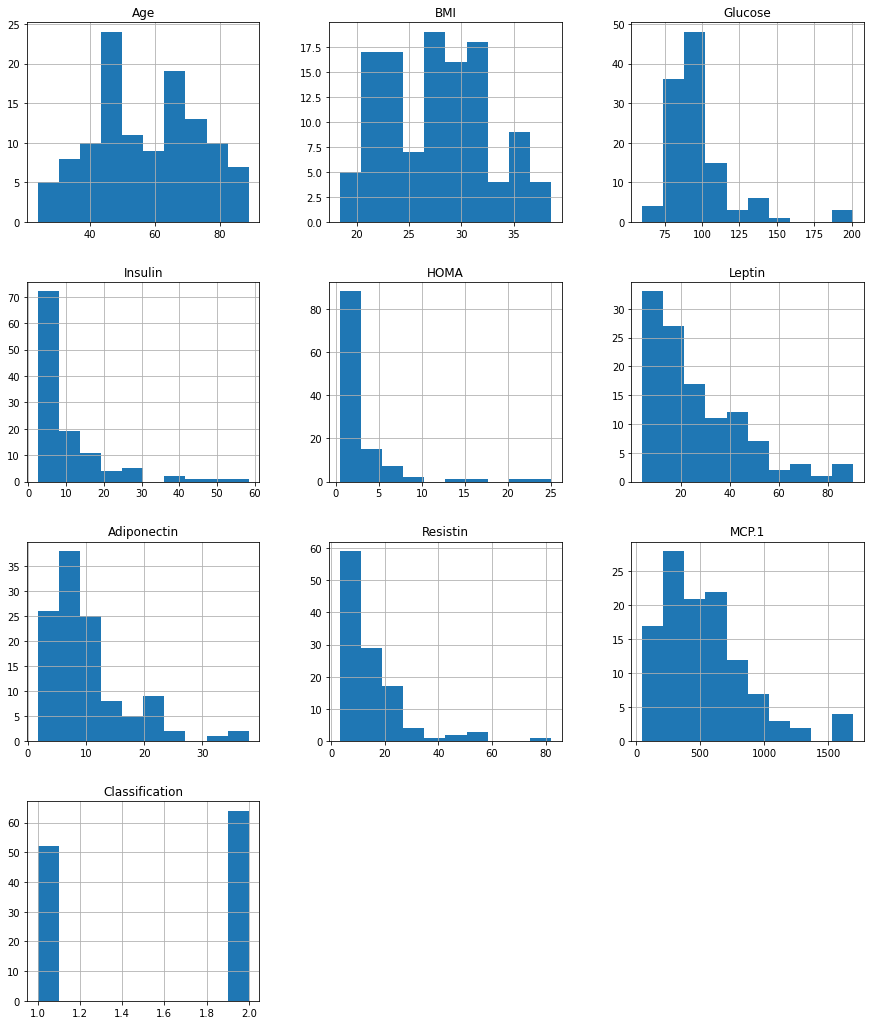

In [14]:
#Data visualization
#Distribution of each variable

def show_hist(x):
    plt.rcParams["figure.figsize"]=15,18
    x.hist()

show_hist(df)

From the above plots, it is clear that variables are not following normal distribution

In [16]:
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

<AxesSubplot:>

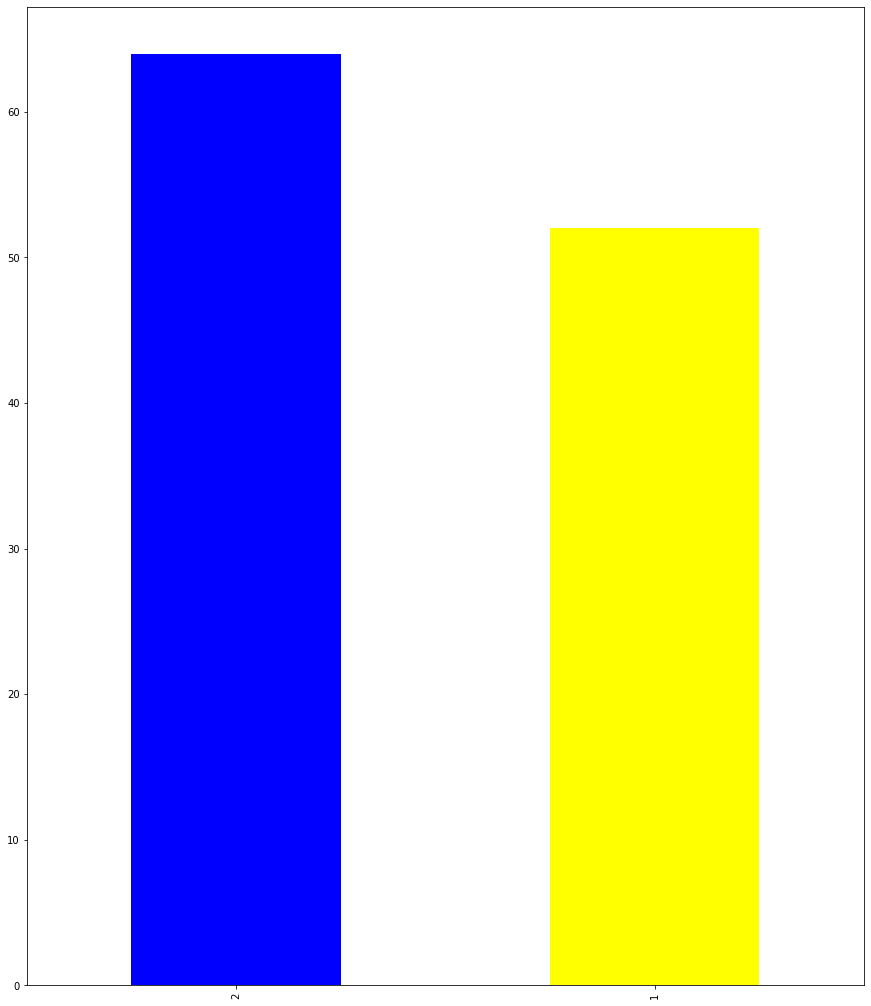

In [15]:
#Check the output variable distribution
df['Classification'].value_counts().plot(kind='bar',color=['blue','yellow'])

We can observe that 64 people are patients and 52 are having healthy control over it. So, dataset is balanced.

In [19]:
#check the unique values in the all variables
categorical_val=[]
continuous_val=[]

for column in df.columns:
    print("===============")
    print(f"{column}:{df[column].unique()}")
    if len(df[column].unique())<=10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

Age:[48 83 82 68 86 49 89 76 73 75 34 29 25 24 38 44 47 61 64 32 36 35 54 45
 50 66 53 28 43 51 67 69 60 77 71 78 85 42 62 59 46 72 55 41 81 65 58 40
 52 74 57]
BMI:[23.5        20.69049454 23.12467037 21.36752137 21.11111111 22.85445769
 22.7        23.8        22.         23.         21.47       23.01
 22.86       18.67       23.34       20.76       22.03       32.03895937
 34.5297228  36.51263743 28.57667585 31.97501487 32.27078777 30.27681661
 30.48315806 37.03560819 38.57875854 31.44654088 35.2507611  34.17489
 36.21227888 36.7901662  35.85581466 34.42217362 27.68877813 29.60676726
 31.2385898  35.09270153 26.34929208 35.58792924 29.2184076  27.2
 27.3        32.5        30.3        27.7        25.7        25.3
 29.4        26.6        27.1        25.9        21.30394858 20.82999519
 20.9566075  24.24242424 21.35991456 21.08281329 19.13265306 22.65625
 22.4996371  21.51385851 22.89281998 22.83287935 23.14049587 24.21875
 22.22222222 20.83       19.56       20.26       24.74       

### 4. Feature Engineering

In [23]:
#Since there are no categorical variables except output variable, we don't need to handle variables

### 5. Feature Selection

<AxesSubplot:>

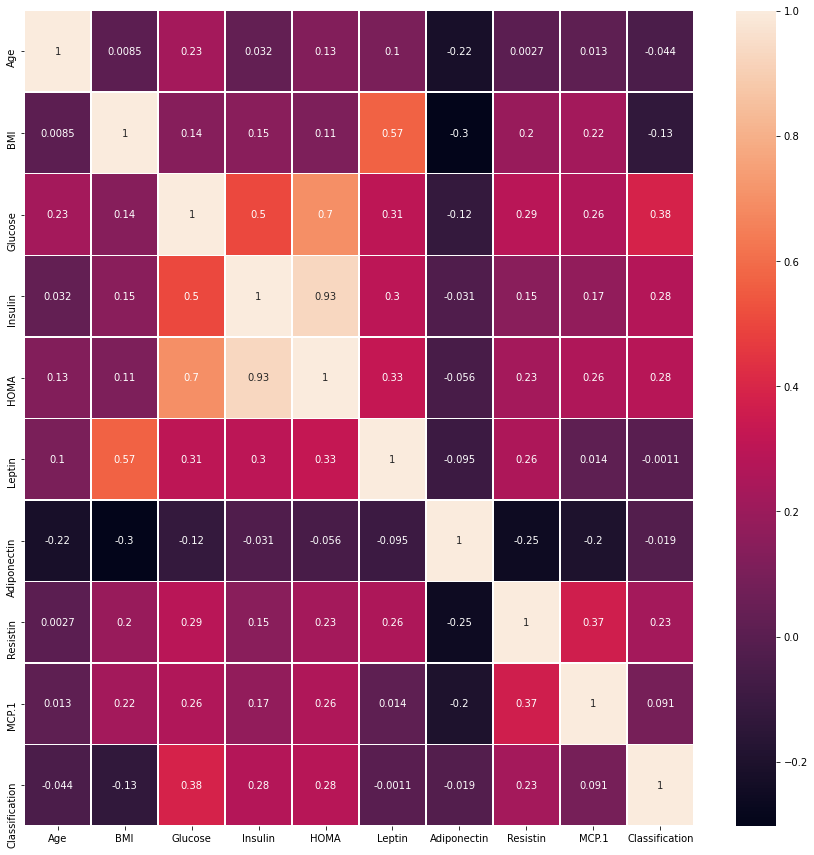

In [21]:
#From above data it is clear that except target variable, no other variables has categorical values.
#Now, will check the correlation between each variables with the help of heat map
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix,annot=True,ax=ax,linewidths=0.5)

Observations:

1. Glucose, insulin, HOMA, Resistin are positively correlated with output.
2. Age, BMI, Adiponectin are negativiely correlated with the output.
3. Leption&BMI, HOMA&Glucose, Insulin&Glucose are highly correlated with each other.


I will choose Age, BMI, Adiponectin, Glucose, insulin, Resistin as features for the model training

In [36]:
#will pre-process the continuous variables for better performance
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
col_to_scale=['Age','BMI','Adiponectin','Glucose','Insulin','Resistin']
df[col_to_scale]=sc.fit_transform(df[col_to_scale])


In [37]:
#Let's split our data into training (70%) and testing (30%) before the model training
from sklearn.model_selection import train_test_split

In [38]:
x=df[['Age','BMI','Adiponectin','Glucose','Insulin','Resistin']]
y=df['Classification']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((81, 6), (35, 6), (81,), (35,))

In [40]:
#I will use simple Logistic Regression Algorithm

In [41]:
#Helper function for printing the classficiation report

In [42]:
from sklearn import *
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def print_Score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("-----------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
    elif train==False:
        pred=clf.predict(x_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("---------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")


In [43]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,-0.579794,-0.816675,-1.239222,-0.728739,0.467409,8.8071,-0.070222,-0.545517,417.114,1
1,1.601821,-1.378751,-0.258299,-0.688038,0.706897,8.8438,-0.697350,-0.864214,468.786,1
2,1.539489,-0.891764,-0.302887,-0.550073,1.009651,17.9393,1.797998,-0.441660,554.697,1
3,0.666843,-1.243303,-0.927110,-0.676965,0.612725,9.8827,-0.441945,-0.158867,928.220,1
4,1.788816,-1.294601,-0.258299,-0.644743,0.805386,6.6994,-0.786881,-0.336352,773.920,1


In [46]:
#Let's train the model
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [47]:
#will print the classification report with the help of print_Score function
print_Score(lr_clf,x_train,x_test,y_train,y_test,train=True)
print_Score(lr_clf,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score:74.07%
---------------------------------
Classification Report:
                   1          2  accuracy  macro avg  weighted avg
precision   0.692308   0.785714  0.740741   0.739011      0.744200
recall      0.750000   0.733333  0.740741   0.741667      0.740741
f1-score    0.720000   0.758621  0.740741   0.739310      0.741456
support    36.000000  45.000000  0.740741  81.000000     81.000000
-----------------------------------
Confusion Matrix:
[[27  9]
 [12 33]]

Test Result:
Accuracy Score:82.86%
---------------------------------
Classification Report:
                 1          2  accuracy  macro avg  weighted avg
precision   0.8125   0.842105  0.828571   0.827303      0.828571
recall      0.8125   0.842105  0.828571   0.827303      0.828571
f1-score    0.8125   0.842105  0.828571   0.827303      0.828571
support    16.0000  19.000000  0.828571  35.000000     35.000000
---------------------------------
Confusion Matrix:
[[13  3]
 [ 3 16]]



In [48]:
#Now, I will try another Machine Learning algorithm to improve the accuracy of model 
#Naive Bayes classifier algorithm 

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
def print_accuracy(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")

In [52]:
#Let' train the model with Naive Bayes classifier
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [54]:
print_accuracy(gnb,x_train,x_test,y_train,y_test,train=True)
print_accuracy(gnb,x_train,x_test,y_train,y_test,train=False)

Accuracy Score:69.14%
Accuracy Score:71.43%


Note: After comparing both the algorithms, we can understand that Logistic Regression is performing well with more accuracy than Naive Bayes classifier. So I will use Logistic Regression for the deployment process

In [55]:
#Now, I will create pickle file to use the model in deployment process

In [56]:
import pickle
pickle_out=open('BreastCancer.pkl','wb')
pickle.dump(lr_clf,pickle_out)
pickle_out.close()